# Nashville Airbnb Rentals Exploratory Data Analysis

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopy.distance as gd
%matplotlib inline

## Import and Load Nashville Airbnb Data

In [2]:
listings =  pd.read_csv('C:/Users/Datasets/NashvilleRentals/Listings.csv')
reviews = pd.read_csv('C:/Users/Datasets/NashvilleRentals/Reviews.csv')

print(f"The listings dataset has {listings.shape[0]} rows and {listings.shape[1]} columns.")
print(f"The reviews dataset has {reviews.shape[0]} rows and {reviews.shape[1]} columns.")

The listings dataset has 8951 rows and 18 columns.
The reviews dataset has 649154 rows and 2 columns.


## Perform Data Preprocessing and Feature Engineering

In [3]:
 # Create Rental Listing Distance From Airport and Nashville City Center
downtown_nashville = (36.165890, -86.784440)  
airport_nashville = (36.131687, -86.668823)
listings["downtown_distance"] = listings.apply(lambda x:gd.distance((x["latitude"], x["longitude"]), downtown_nashville).miles, axis=1)
listings["airport_distance"] = listings.apply(lambda x:gd.distance((x["latitude"], x["longitude"]), airport_nashville).miles, axis=1)

In [4]:
## Merge Listings and Reviews as Nashville Dataset
# Rename the Primary Key Linking Both Datasets as 'id' in the Reviews Dataset
reviews.rename(columns = {'listing_id' : 'id'}, inplace = True)

# Merge Both Datasets into One File and Check Data in Preparation for Data Cleaning
nashville = pd.merge(reviews, listings, on='id')

In [5]:
# Split Date Column into Year and Month
nashville['year'] = nashville['date'].str.split('-', expand = True)[0]
nashville['month'] = nashville['date'].str.split('-', expand = True)[1].astype(int)

# Create 'season' Column from 'month' column and Transform 'month' Column
season_map = {1: 'Winter', 2: 'Winter', 3 : 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
nashville['season'] = nashville['month'].map(season_map) 
month_map = {1: 'January', 2: 'February', 3 : 'March',4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
nashville['month'] = nashville['month'].map(month_map)

# Drop Unneeded Column After Feature Engineering and Data Transformation
nashville.drop(columns = ['date', 'name', 'neighbourhood_group'], inplace = True)

## What the Data Says for Customers (Renters)

In [6]:
# Number of Available Listings in the Nashville Airbnb Ecosystem
print(f"There are {listings.id.nunique()} unique Airbnb rental listings in Nashville, TN")

There are 8951 unique Airbnb rental listings in Nashville, TN


In [7]:
# Average and Median Rental Listing Price Per Night in the  Nashville Airbnb Ecosystem
avg = listings.price.mean()
med = listings.price.median()
low = listings.price.min()
high = listings.price.max()
print(f"In Nashville, TN, nightly Airbnb rental prices could be as low as ${round(low)} and as high as ${round(high)}. Furthermore, the average nightly price of an Airbnb rental listing is ${round(avg)}, while its median is around ${round(med)}")

In Nashville, TN, nightly Airbnb rental prices could be as low as $19 and as high as $4163. Furthermore, the average nightly price of an Airbnb rental listing is $197, while its median is around $158


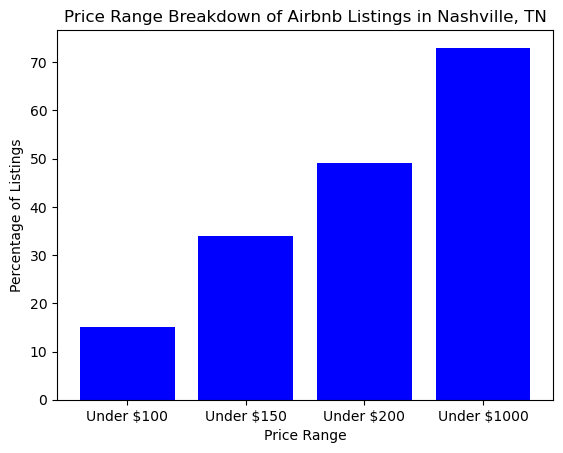

In [8]:
# Price Categories  
below_100 = (len(listings[listings.price < 100])/len(listings.price))*100
below_150 = (len(listings[listings.price < 150])/len(listings.price))*100
below_200 = (len(listings[listings.price < 200])/len(listings.price))*100
below_1000 = (len(listings[listings.price < 1000])/len(listings.price))*100
price_ranges = {'Under $100': round(below_100), 'Under $150': round(below_150), 'Under $200': round(below_200), 'Under $1000': round(below_1000)}

# Price Range Breakdown of Airbnb Listings in Nashville, TN
plt.bar((price_ranges.keys()), list(price_ranges.values()), align='center', color = 'blue')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Listings')
plt.title("Price Range Breakdown of Airbnb Listings in Nashville, TN");

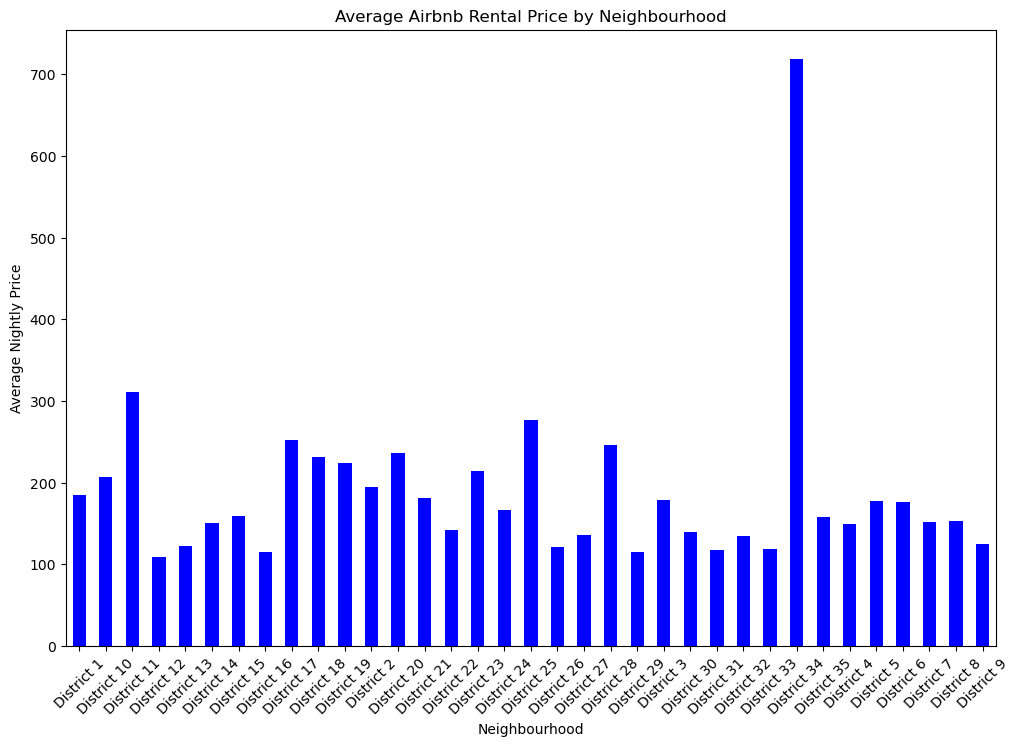

In [9]:
# Average Nashville Nightly Airbnb Listings Price by Neighbourhood
plt.figure(figsize=(12, 8))
neighbourhood_price = listings.groupby('neighbourhood')['price'].mean()
neighbourhood_price.plot(kind = 'bar', color = 'blue')
plt.title('Average Airbnb Rental Price by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Nightly Price')
plt.xticks(rotation=45)

# Show the plot
plt.show()

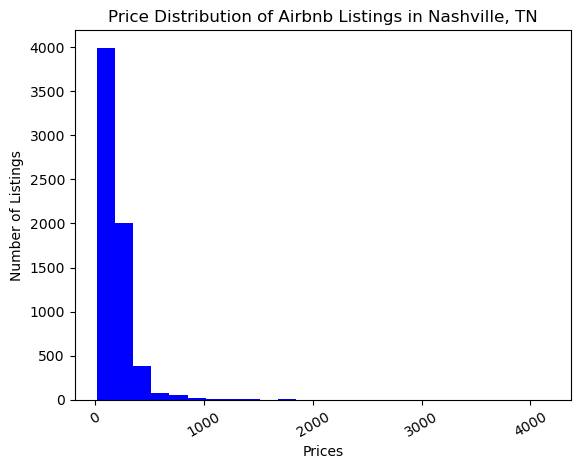

In [10]:
# Price Distribution of Airbnb Listings in Nashville, TN
plt.hist(data = listings, x = 'price', color = 'blue', bins = 25)
plt.xlabel('Prices')
plt.ylabel('Number of Listings')
plt.xticks(rotation=30)
plt.title("Price Distribution of Airbnb Listings in Nashville, TN");

In [11]:
# Prevalent Listing Types in the Nashville Airbnb Ecosystem
listings.room_type.value_counts(normalize=True)

room_type
Entire home/apt    0.898447
Private room       0.098425
Hotel room         0.002458
Shared room        0.000670
Name: proportion, dtype: float64

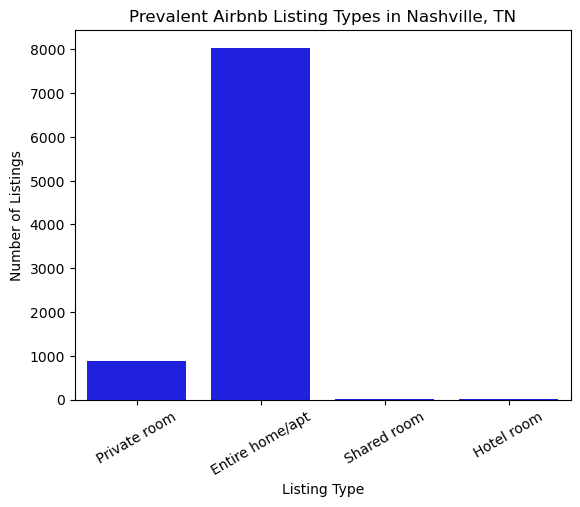

In [12]:
# Prevalent Listing Types in Nashville Airbnb Ecosystem
sns.countplot(data=listings,x='room_type', color = 'blue')
plt.xlabel('Listing Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=30)
plt.title("Prevalent Airbnb Listing Types in Nashville, TN");

In [13]:
# Distribution of Rental Listings Availability over 365 Days
one_three = len(listings[(listings.availability_365 >= 0) & (listings.availability_365 < 90)])
four_six = len(listings[(listings.availability_365 >= 90) & (listings.availability_365 < 180)])
seven_nine = len(listings[(listings.availability_365 >= 180) & (listings.availability_365 < 270)])
ten_twelve = len(listings[(listings.availability_365 >= 270) & (listings.availability_365 <= 365)])

availability = [one_three,four_six,seven_nine,ten_twelve]

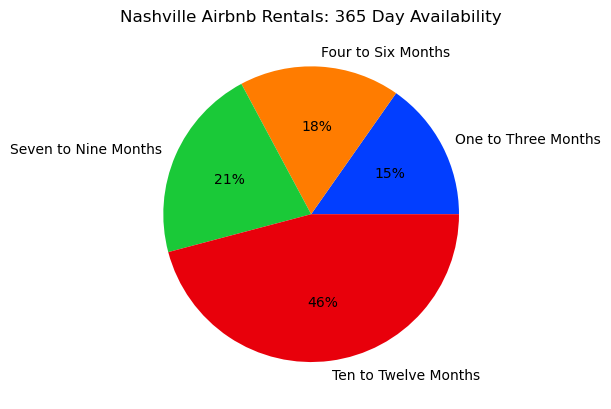

In [14]:
# 365-day Availability Visualization
color = sns.color_palette('bright') 
plt.pie(availability, labels=['One to Three Months','Four to Six Months','Seven to Nine Months','Ten to Twelve Months'], colors=color, autopct='%.0f%%')
plt.title('Nashville Airbnb Rentals: 365 Day Availability')
plt.show() 

In [15]:
# Short-Term vs Long-Term Stays (28 Day Benchmark)
short_term = len(listings[listings.minimum_nights < 28])
long_term = len(listings[listings.minimum_nights > 28])
rental_type = [short_term, long_term]
print(f"In the Nashville Airbnb ecosystem, just {round((long_term/(long_term+short_term)) * 100 , 2)}% of listings provide long-term rentals while {round((short_term/(long_term+short_term)) * 100, 2)} of listings provide short-term stays.")
print(f"Averagely, Nashville Airbnb listings have a minimum nights booking requirement of {round(listings.minimum_nights.mean())} nights, indicating that an average listing would offer short-term rental options")

In the Nashville Airbnb ecosystem, just 13.37% of listings provide long-term rentals while 86.63 of listings provide short-term stays.
Averagely, Nashville Airbnb listings have a minimum nights booking requirement of 6 nights, indicating that an average listing would offer short-term rental options


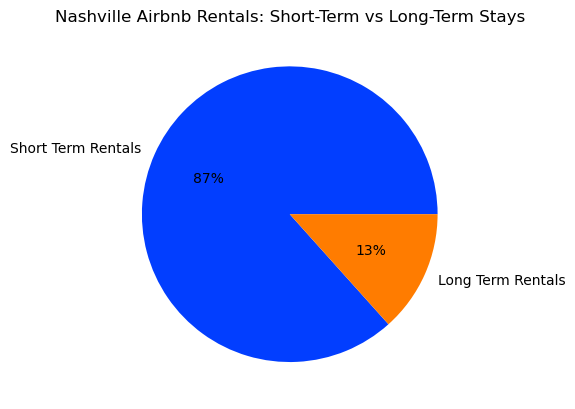

In [16]:
# Short-Term vs Long-Term Stays Visual
color = sns.color_palette('bright') 
plt.pie(rental_type, labels=['Short Term Rentals','Long Term Rentals'], colors=color, autopct='%.0f%%')
plt.title('Nashville Airbnb Rentals: Short-Term vs Long-Term Stays')
plt.show() 

In [17]:
# Distance of Listing from Nashville Airport
avg = listings.airport_distance.mean()
under_avg = len(listings[listings.airport_distance < avg])
above_avg = len(listings[listings.airport_distance > avg])

print(f"{round(under_avg/(above_avg+under_avg)*100)}% of Nashville Airbnb Listings are within a {round(avg)} mile radius of the Nashville Airport while {round(above_avg/(above_avg+under_avg)*100)}% of Nashville Airbnb Listings are located beyond a 7 mile radius of the Nashville Airport.")
print(f"Averagely, Nashville Airbnb Listings are located within a {round(avg)} mile radius of the Nashville Airport.")

56% of Nashville Airbnb Listings are within a 7 mile radius of the Nashville Airport while 44% of Nashville Airbnb Listings are located beyond a 7 mile radius of the Nashville Airport.
Averagely, Nashville Airbnb Listings are located within a 7 mile radius of the Nashville Airport.


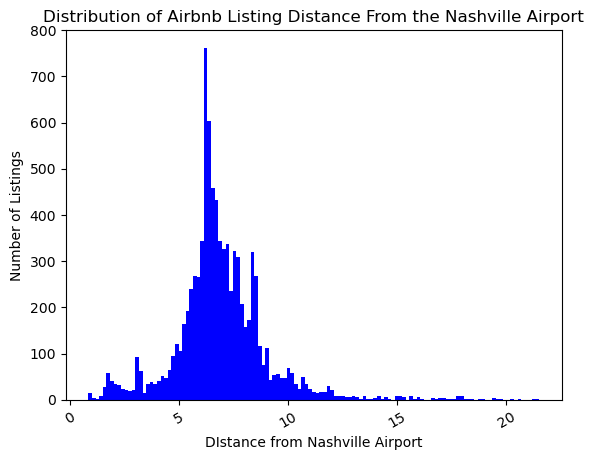

In [18]:
# Distribution of Listing Distance From the Nashville Airport
plt.hist(data = listings, x = 'airport_distance', color = 'blue', bins = 125)
plt.xlabel('DIstance from Nashville Airport')
plt.ylabel('Number of Listings')
plt.xticks(rotation=30)
plt.title("Distribution of Airbnb Listing Distance From the Nashville Airport");

In [19]:
# Distance of Listing from Downtown Nashville
avg = listings.downtown_distance.mean()
under_avg = len(listings[listings.downtown_distance < avg])
above_avg = len(listings[listings.downtown_distance > avg])

print(f"{round(under_avg/(above_avg+under_avg)*100)}% of Nashville Airbnb Listings are within a {round(avg)} mile radius of the Nashville Downtown area while {round(above_avg/(above_avg+under_avg)*100)}% of Nashville Airbnb Listings are located beyond a {round(avg)} mile radius of the Nashville Downtown area.")
print(f"Averagely, Nashville Airbnb Listings are located within a {round(avg)} mile radius of the Nashville Downtown area.")

66% of Nashville Airbnb Listings are within a 3 mile radius of the Nashville Downtown area while 34% of Nashville Airbnb Listings are located beyond a 3 mile radius of the Nashville Downtown area.
Averagely, Nashville Airbnb Listings are located within a 3 mile radius of the Nashville Downtown area.


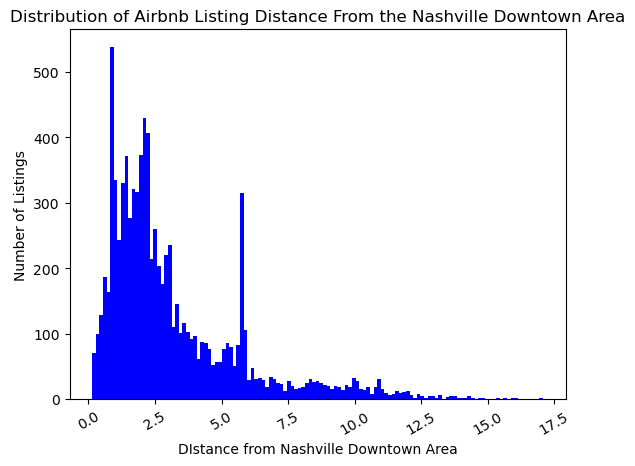

In [20]:
# Distribution of Listing Distance From the Nashville Downtown Area
plt.hist(data = listings, x = 'downtown_distance', color = 'blue', bins = 125)
plt.xlabel('DIstance from Nashville Downtown Area')
plt.ylabel('Number of Listings')
plt.xticks(rotation=30)
plt.title("Distribution of Airbnb Listing Distance From the Nashville Downtown Area");

## What the Data Says for Businesses and Investors

In [21]:
# Take Out the 2024 Portion of the Data Since there's only 3 Months Old
plot1 = nashville[nashville.year != '2024']

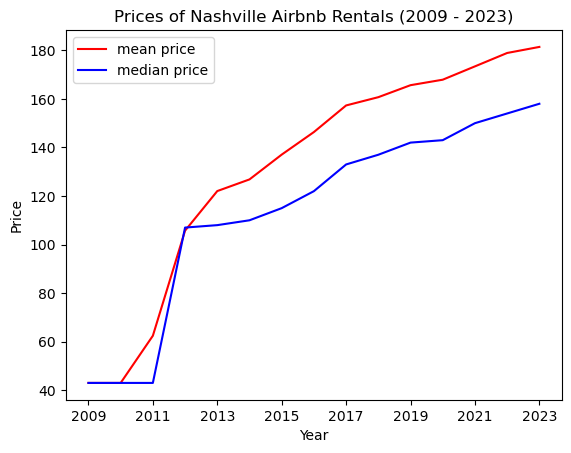

In [22]:
# Year on Year Movement of Average Nightly Airbnb Rental Prices 
mean_prices = plot1.groupby('year')['price'].mean()
median_prices = plot1.groupby('year')['price'].median()

mean_prices.plot(color = 'red')
median_prices.plot(color = 'blue')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title("Prices of Nashville Airbnb Rentals (2009 - 2023)")
plt.legend(['mean price','median price']);

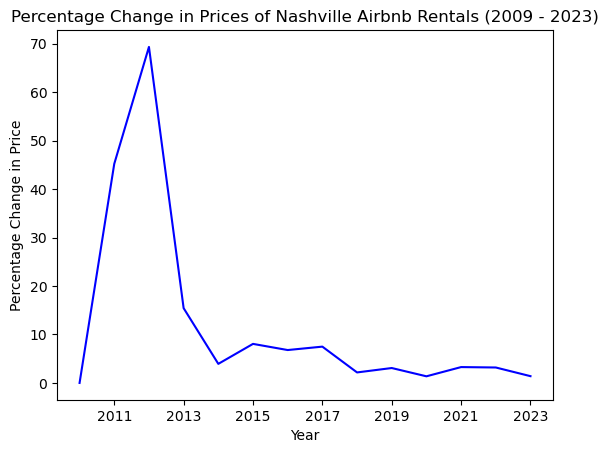

In [23]:
# Year-on-Year Price Change in the Average Listing Price of Nashville Airbnb Listings
price_change = mean_prices.pct_change() * 100
price_change.plot(color = 'blue')
plt.xlabel('Year')
plt.ylabel('Percentage Change in Price')
plt.title("Percentage Change in Prices of Nashville Airbnb Rentals (2009 - 2023)");

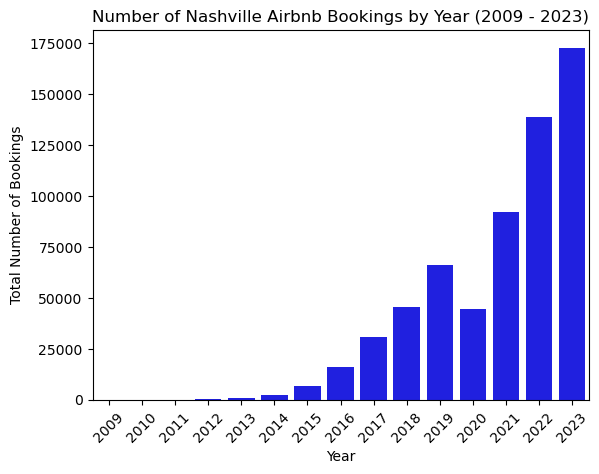

In [24]:
# Number of Rental Bookings by Year
sns.countplot(data=plot1,x='year', color ='blue')
plt.xlabel('Year')
plt.ylabel('Total Number of Bookings')
plt.xticks(rotation=45)
plt.title("Number of Nashville Airbnb Bookings by Year (2009 - 2023)");

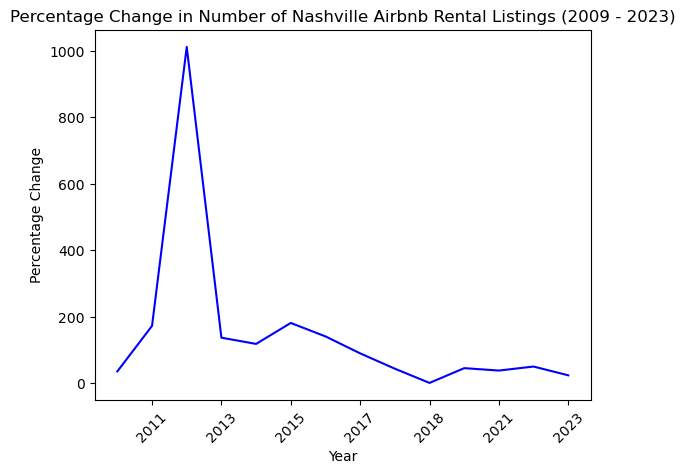

In [25]:
bookings_growth = plot1['year'].value_counts().sort_values()
bookings_growth_change = bookings_growth.pct_change() * 100
bookings_growth_change.plot(color = 'blue')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.title("Percentage Change in Number of Nashville Airbnb Rental Listings (2009 - 2023)")
plt.xticks(rotation=45);

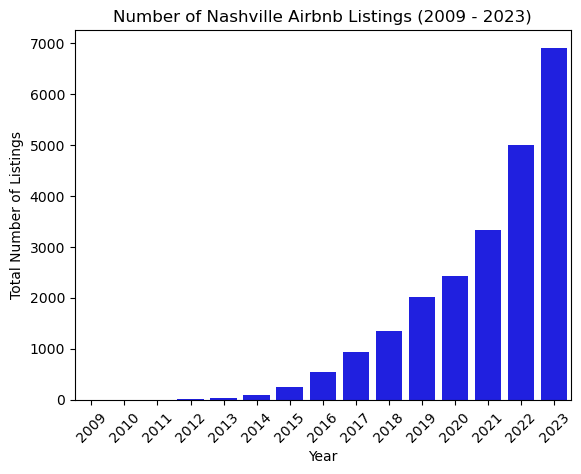

In [26]:
# How has the Number of Available Listings in the Nashville Airbnb Ecosystem grown since 2009? 
listings_growth = plot1.groupby('year')['id'].nunique()
sns.barplot(x = listings_growth.index , y = listings_growth.values, color = 'blue')
plt.xlabel('Year')
plt.ylabel('Total Number of Listings')
plt.xticks(rotation=45)
plt.title("Number of Nashville Airbnb Listings (2009 - 2023)");

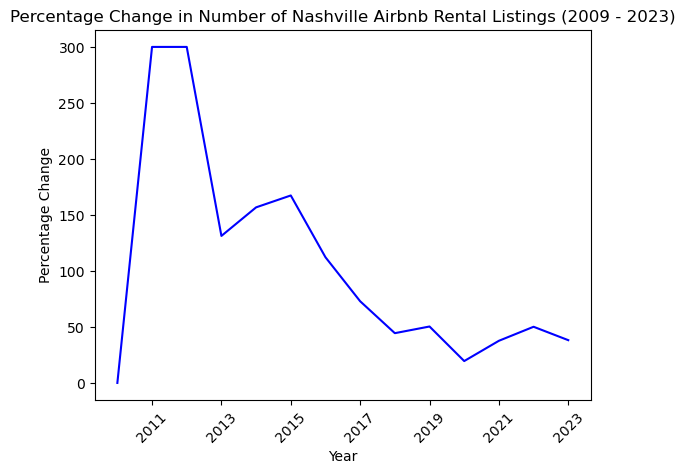

In [27]:
# Year-on-Year Price Change in the Average Listing Price of Nashville Airbnb Listings
listings_growth_change = listings_growth.pct_change() * 100
listings_growth_change.plot(color = 'blue')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.title("Percentage Change in Number of Nashville Airbnb Rental Listings (2009 - 2023)")
plt.xticks(rotation=45);

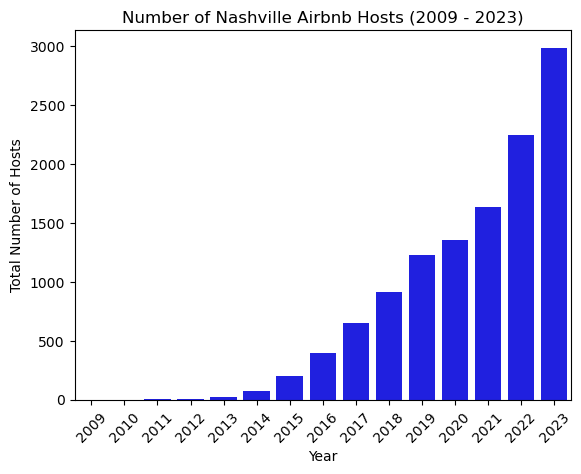

In [28]:
# How has the Numbe of Hosts in the Nashville Airbnb Ecosystem grown since 2009? 
hosts_growth = plot1.groupby('year')['host_id'].nunique()
sns.barplot(x = hosts_growth.index , y = hosts_growth.values, color = 'blue')
plt.xlabel('Year')
plt.ylabel('Total Number of Hosts')
plt.xticks(rotation=45)
plt.title("Number of Nashville Airbnb Hosts (2009 - 2023)");

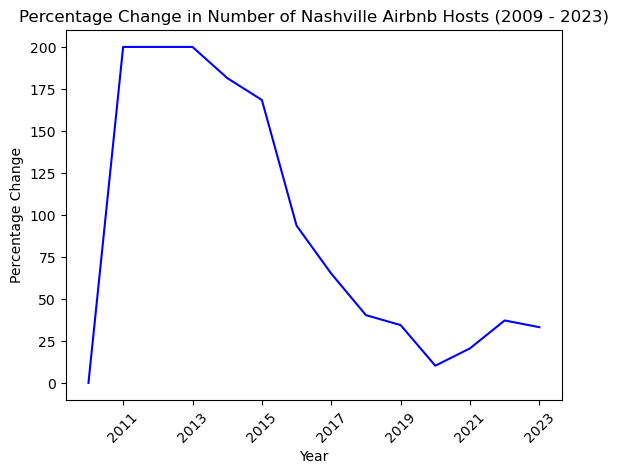

In [29]:
# Year-on-Year Change in the Number of Nashville Airbnb Hosts
hosts_growth_change = hosts_growth.pct_change() * 100
hosts_growth_change.plot(color = 'blue')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.title("Percentage Change in Number of Nashville Airbnb Hosts (2009 - 2023)")
plt.xticks(rotation=45);

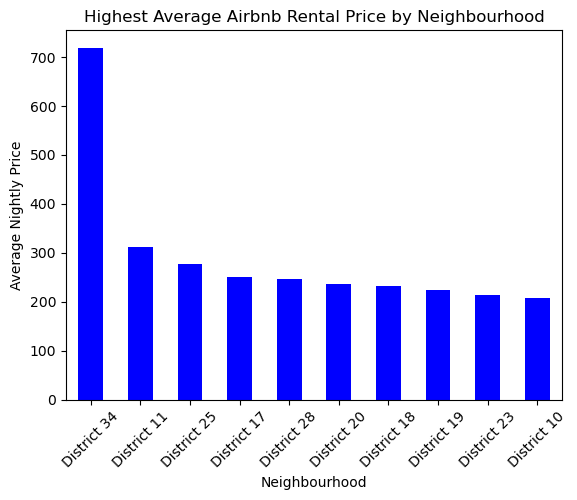

In [30]:
# Top 10 Airbnb Rental Prices by Nashville Neighbourhood
top_neighbourhood_price = listings.groupby('neighbourhood')['price'].mean().sort_values(ascending = True)
top_neighbourhood_price.tail(10).sort_values(ascending = False).plot(kind = 'bar', color = 'blue')
plt.title('Highest Average Airbnb Rental Price by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Nightly Price')
plt.xticks(rotation=45)

# Show the plot
plt.show()

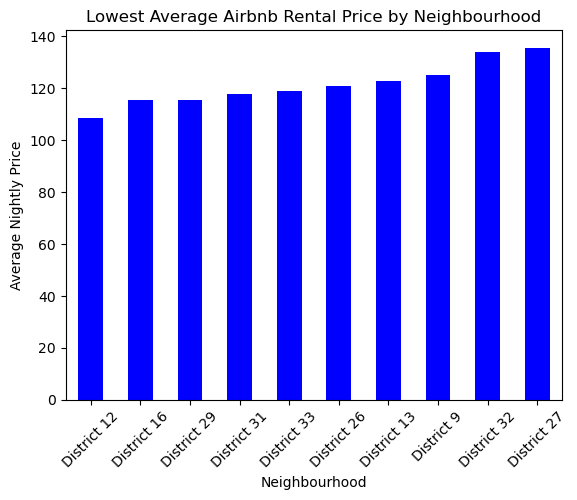

In [31]:
# Bottom 10 Airbnb Rental Prices by Nashville Neighbourhood
bottom_neighbourhood_price = listings.groupby('neighbourhood')['price'].mean().sort_values(ascending = True)
bottom_neighbourhood_price.head(10).sort_values(ascending = True).plot(kind = 'bar', color = 'blue')
plt.title('Lowest Average Airbnb Rental Price by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Nightly Price')
plt.xticks(rotation=45)

# Show the plot
plt.show()

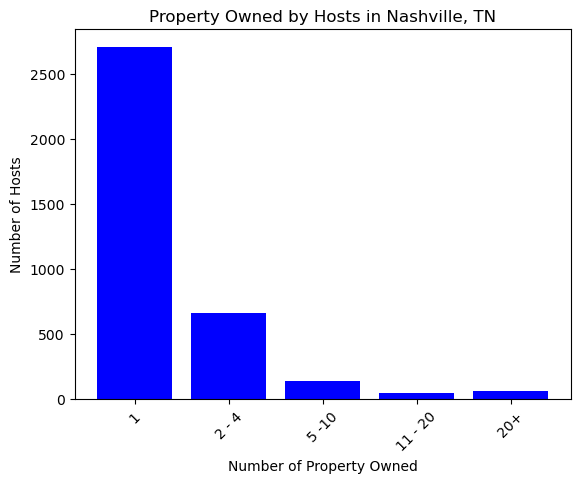

In [32]:
# Number of Properties Owned by Nashville Airbnb Hosts
property_by_host = listings.host_id.value_counts()
one_property = (property_by_host.values == 1).sum()
two_four = ((property_by_host.values >= 2) & (property_by_host.values <= 4)).sum()
five_ten = ((property_by_host.values >= 5) & (property_by_host.values <= 10)).sum()
eleven_twenty = ((property_by_host.values >= 11) & (property_by_host.values <= 20)).sum()
above_twenty = (property_by_host.values > 20).sum()
property_ranges = {'1': one_property, '2 - 4': two_four, '5 -10': five_ten, '11 - 20': eleven_twenty, '20+' : above_twenty}

# Price Range Breakdown of Airbnb Listings in Nashville, TN
plt.bar((property_ranges.keys()), list(property_ranges.values()), align='center', color = 'blue')
plt.xlabel('Number of Property Owned')
plt.ylabel('Number of Hosts')
plt.xticks(rotation =45)
plt.title("Property Owned by Hosts in Nashville, TN");